# 주제 : 자동으로 모은 데이터는 분석하기 어렵다면서?<br> 자동으로 모은 중고 자동차 데이터를 분석해보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Jupyter에 불러옵니다.(kaggle install 필요)
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 자동차 연식
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    posting_date : 시스템에 기록된 날짜
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득
---

## Step 0. 데이터 스크래핑이 대하여

### 스크래핑을 이용한 자동 데이터 습득

### 스크래핑된 데이터에서 아웃라이어의 특징


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
# 시스템 운영체제 기능 사용

import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# USERNAME, KEY 개인별 API 값을 입력하세요.

# kaggle.com - 로그인 - 오른쪽 상단 아이콘(Your Profile)
# 상단 탭 메뉴 - Account - API
# Create New Token - 생성(json 파일 다운, 메모장으로 열기 - UserName, Key 확인)
# Expire Token - 해지(만기)

os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기(윈도우 사용 할 수 없음.)

# kaggle 설치 필요(Anaconda Prompt - 관리자 권한으로 실행, pip install kaggle)
# 현재 파일 상단 셀에 '데이터 출처' 링크 접근
# 오른쪽 상단 점3개 클릭, Copy API Command 클릭 후 아래 명령어 붙여넣기

!kaggle datasets download -d austinreese/craigslist-carstrucks-data


  0%|          | 0.00/262M [00:00<?, ?B/s]
  0%|          | 1.00M/262M [00:00<02:55, 1.56MB/s]
  1%|1         | 3.00M/262M [00:00<01:09, 3.89MB/s]
  2%|2         | 6.00M/262M [00:01<00:38, 6.97MB/s]
  3%|3         | 8.00M/262M [00:01<00:29, 9.07MB/s]
  4%|3         | 10.0M/262M [00:01<00:27, 9.65MB/s]
  5%|4         | 12.0M/262M [00:01<00:24, 10.7MB/s]
  5%|5         | 14.0M/262M [00:01<00:23, 11.2MB/s]
  6%|6         | 16.0M/262M [00:01<00:22, 11.5MB/s]
  7%|6         | 18.0M/262M [00:02<00:21, 11.7MB/s]
  8%|7         | 20.0M/262M [00:02<00:21, 11.9MB/s]
  8%|8         | 22.0M/262M [00:02<00:21, 12.0MB/s]
  9%|9         | 24.0M/262M [00:02<00:20, 12.1MB/s]
 10%|9         | 26.0M/262M [00:02<00:20, 12.1MB/s]
 11%|#         | 28.0M/262M [00:02<00:20, 12.2MB/s]
 11%|#1        | 30.0M/262M [00:03<00:20, 12.1MB/s]
 12%|#2        | 32.0M/262M [00:03<00:21, 11.5MB/s]
 13%|#2        | 34.0M/262M [00:03<00:19, 12.5MB/s]
 14%|#3        | 36.0M/262M [00:03<00:19, 12.5MB/s]
 14%|#4        | 38.

In [5]:
# 압축 해제 시스템(윈도우) 명령 실행

os.system('powershell.exe Expand-Archive craigslist-carstrucks-data.zip')

0

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [63]:
df = pd.read_csv('./craigslist-carstrucks-data/vehicles.csv')

In [48]:
df.shape

(426880, 26)

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [49]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [51]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [52]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [53]:
df.columns

# drop 컬럼명(삭제 할 컬럼들)
# 'id', 'url', 'region_url', 'title_status', 'VIN', 'image_url', 'description', 'county','state','lat','long', 'posting_date'

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [64]:
df.drop(['id', 'url', 'region_url', 'title_status', 'VIN', 'image_url', 
         'description', 'county','state','lat','long', 'posting_date'], axis = 1, inplace = True)

# inplace = True - drop 후 남아 있는 데이터를 그대로 df에 할당

In [65]:
# year -> age로 표현(2022 - year)

df['age'] = 2022 - df['year']
df.drop('year', axis = 1, inplace = True)

In [56]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,NaN,sedan,NaN,3.0
426876,wyoming,30590,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,other,fwd,NaN,sedan,red,2.0
426877,wyoming,34990,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,other,NaN,NaN,hatchback,white,2.0
426878,wyoming,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,NaN,sedan,silver,4.0


In [56]:
# inplace 관련 확인

ex = pd.DataFrame({'a':[1, 2, 3],
                  'b':[4, 5, 6],
                  'c':[7, 8, 9]})
ex

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [57]:
ex.drop('a', axis = 1, inplace = True)
ex

,b,c
0,4,7
1,5,8
2,6,9


### 문제 5. 범주형 데이터의 통계 분석하기


In [16]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

In [17]:
# 범주형 데이터의 값의 범위, 기초 통계 분석하기

df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [18]:
# manufacturer 종류수 구하기

len(df['manufacturer'].value_counts())

42

<Axes: xlabel='count', ylabel='manufacturer'>

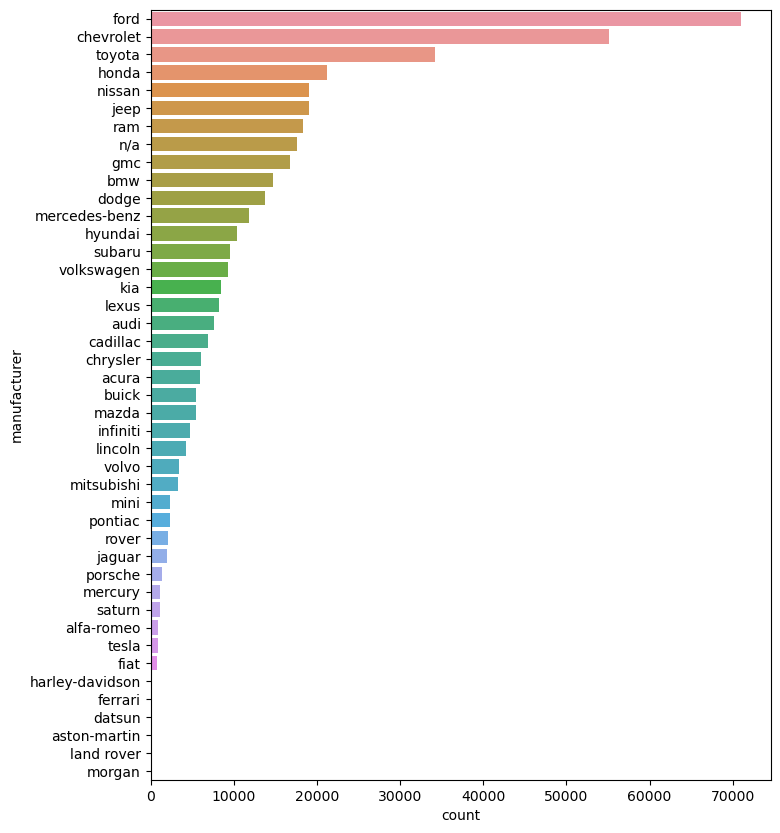

In [19]:
fig = plt.figure(figsize = (8, 10))
sns.countplot(y = 'manufacturer', data = df.fillna('n/a'),
             order = df.fillna('n/a')['manufacturer'].value_counts().index)

In [20]:
print(df['model'].value_counts())
len(df['model'].value_counts())

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64


29667

In [21]:
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
    print(model, num)

f-150 8009
silverado 1500 5140
1500 4211
camry 3135
silverado 3023
accord 2969
wrangler 2848
civic 2799
altima 2779
escape 2746
2500 2687
tacoma 2582
explorer 2499
grand cherokee 2489
corolla 2241
mustang 2225
fusion 1979
equinox 1972
cr-v 1930
focus 1832
malibu 1764
tahoe 1729
charger 1719
corvette 1711
rav4 1701
sonata 1686
impala 1682
sierra 1500 1658
grand caravan 1601
cruze 1559
outback 1551
silverado 2500hd 1545
f-250 1529
elantra 1498
odyssey 1494
3500 1491
edge 1471
prius 1435
tundra 1425
jetta 1384
rogue 1332
forester 1318
sentra 1288
sierra 1282
wrangler unlimited 1273
camaro 1159
soul 1137
pilot 1118
c-class 1117
sienna 1116
f-350 1116
f150 1089
cherokee 1078
4runner 1073
highlander 1068
suburban 1066
expedition 1058
traverse 985
impreza 960
optima 958
challenger 953
acadia 925
3 series 917
sierra 2500hd 895
e-class 885
yukon 884
x5 880
santa fe 826
taurus 820
200 817
ranger 813
terrain 801
colorado 798
durango 794
f250 791
mdx 791
sorento 790
journey 779
escalade 773
enclav

In [22]:
df.columns

# 모델 분류가 많아서 에러 발생 확률 높음(모델이름에 $ 값으로 표시된 부분의 영향 있음)

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

<Axes: xlabel='count', ylabel='condition'>

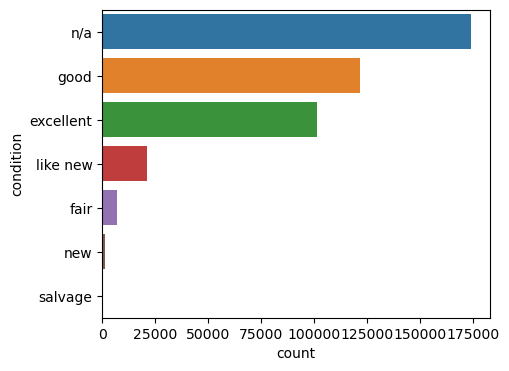

In [23]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'condition', data = df.fillna('n/a'),
             order = df.fillna('n/a')['condition'].value_counts().index)

<Axes: xlabel='count', ylabel='cylinders'>

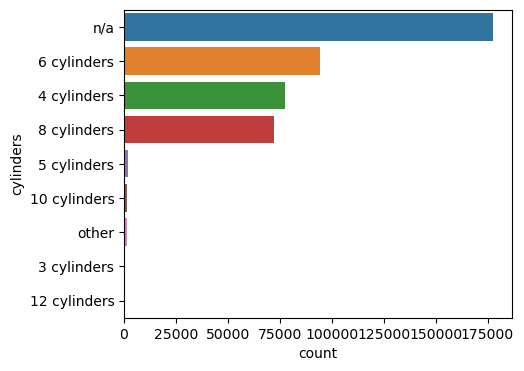

In [24]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'cylinders', data = df.fillna('n/a'),
             order = df.fillna('n/a')['cylinders'].value_counts().index)

<Axes: xlabel='count', ylabel='fuel'>

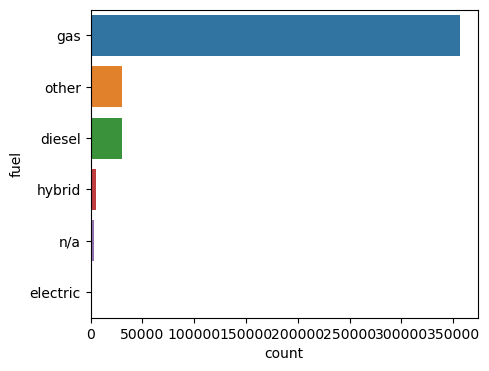

In [25]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'fuel', data = df.fillna('n/a'),
             order = df.fillna('n/a')['fuel'].value_counts().index)

<Axes: xlabel='count', ylabel='transmission'>

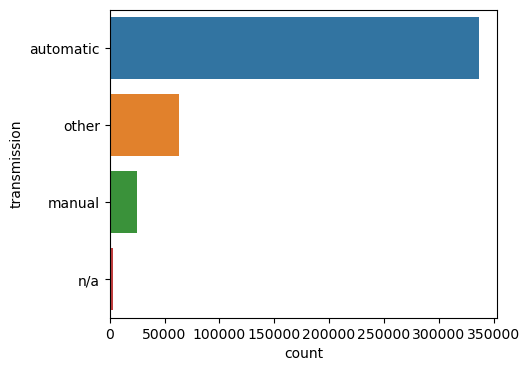

In [26]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'transmission', data = df.fillna('n/a'),
             order = df.fillna('n/a')['transmission'].value_counts().index)

<Axes: xlabel='count', ylabel='drive'>

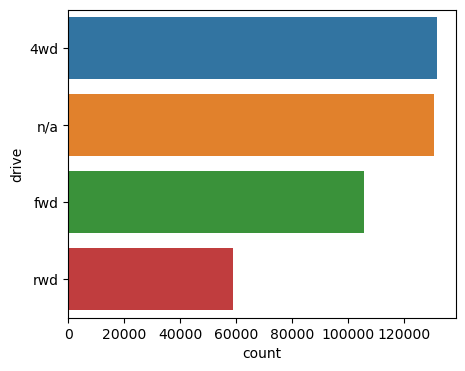

In [27]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'drive', data = df.fillna('n/a'),
             order = df.fillna('n/a')['drive'].value_counts().index)

<Axes: xlabel='count', ylabel='size'>

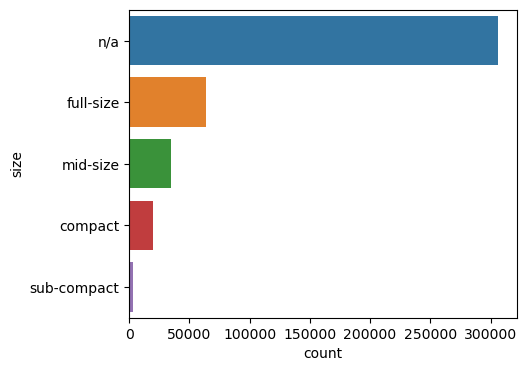

In [28]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'size', data = df.fillna('n/a'),
             order = df.fillna('n/a')['size'].value_counts().index)

<Axes: xlabel='count', ylabel='type'>

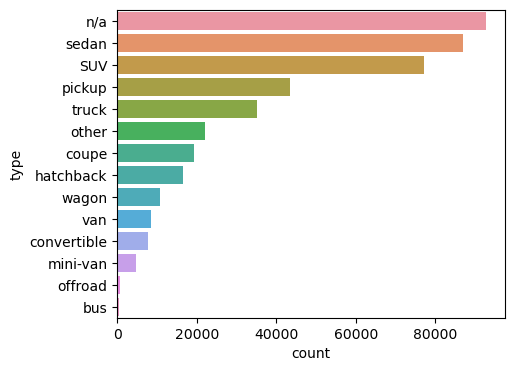

In [29]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'type', data = df.fillna('n/a'),
             order = df.fillna('n/a')['type'].value_counts().index)

<Axes: xlabel='count', ylabel='paint_color'>

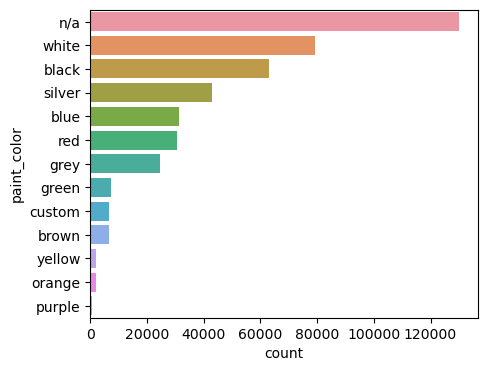

In [30]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'paint_color', data = df.fillna('n/a'),
             order = df.fillna('n/a')['paint_color'].value_counts().index)

### 문제 6. 수치형 데이터의 통계 분석하기

In [78]:
# histplot 표현 어렵다(데이터 양의 문제)
# 아웃라이어, 넓은 범위의 데이터로 인해 오류 발생

sns.histplot(x = 'price', data = df)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000186CE03E440> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001873C4780D0> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='price'>

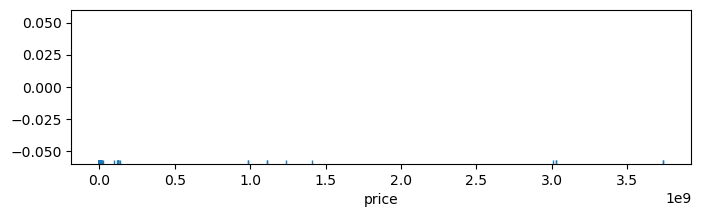

In [31]:
fig = plt.figure(figsize = (8, 2))
sns.rugplot(x = 'price', data = df)

<Axes: xlabel='price'>

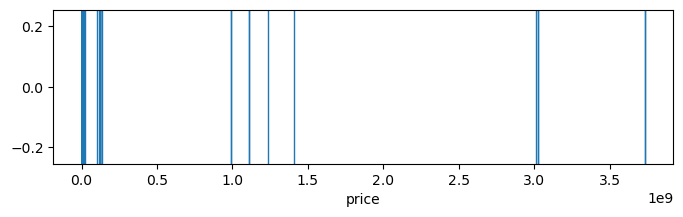

In [32]:
fig = plt.figure(figsize = (8, 2))
sns.rugplot(x = 'price', data = df, height = 1)

<Axes: xlabel='odometer'>

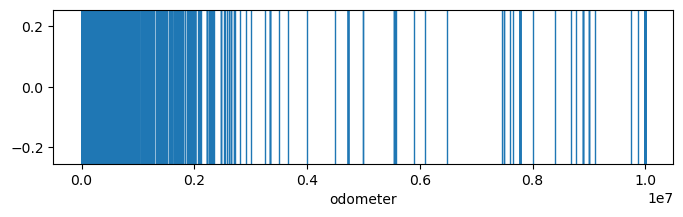

In [33]:
fig = plt.figure(figsize = (8, 2))
sns.rugplot(x = 'odometer', data = df, height = 1)

<Axes: xlabel='age', ylabel='Count'>

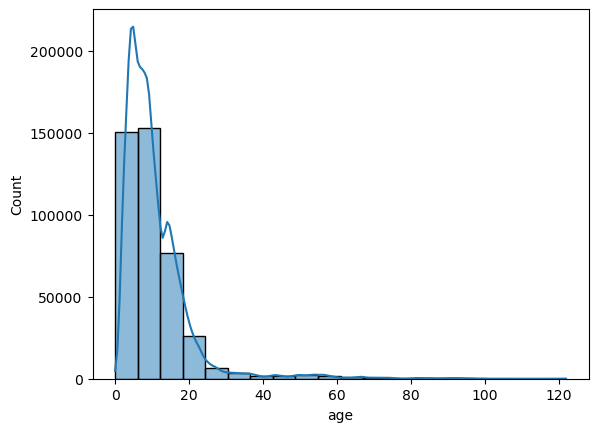

In [34]:
sns.histplot(x = 'age', data = df, bins = 20, kde = True)

## Step 3. 데이터 클리닝 수행하기

### 문제 7. 범주형 데이터 시각화하여 분석하기

<Axes: xlabel='manufacturer', ylabel='price'>

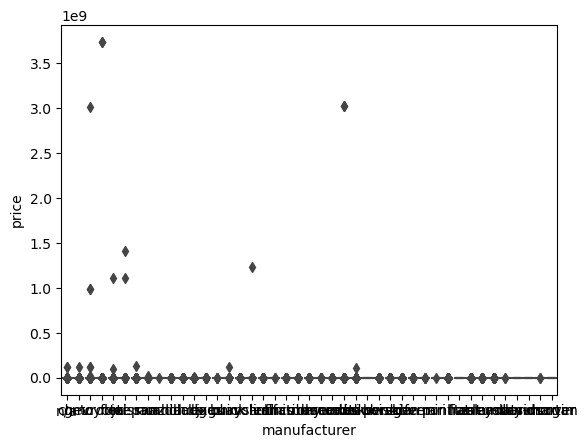

In [35]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기

# price와 연관해서 살펴보기, 아웃라이어 심각한 수준(범주형 데이터 클리닝이 먼저 필요)

sns.boxplot(x = 'manufacturer', y = 'price', data = df.fillna('n/a'))

<Axes: xlabel='fuel', ylabel='price'>

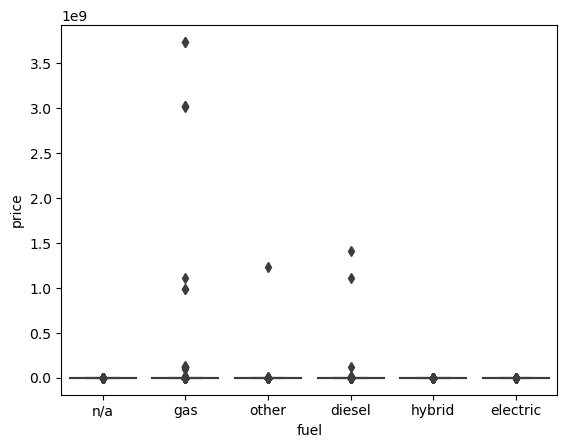

In [36]:
sns.boxplot(x = 'fuel', y = 'price', data = df.fillna('n/a'))

### 문제 8. 범주형 데이터 클리닝하기

In [38]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

In [57]:
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기

df['manufacturer'].fillna('others').value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
others             17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63


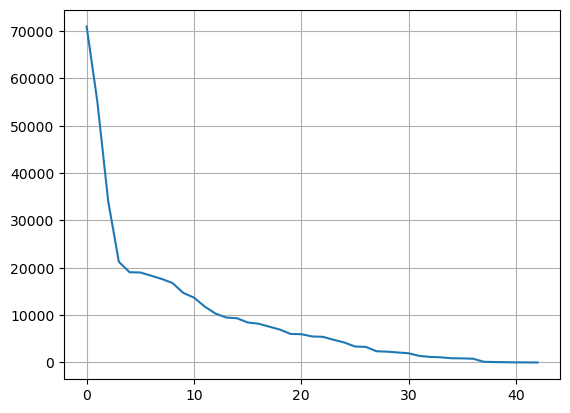

In [66]:
# na 처리를 후 할당 여부를 반드시 확인해야 함
df['manufacturer'] = df['manufacturer'].fillna('others')

counts = df['manufacturer'].value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [67]:
df['manufacturer'] = df['manufacturer'].apply(lambda s: s if str(s) not in counts.index[10:] else 'others')

In [68]:
df['manufacturer'].value_counts()

others       157453
ford          70985
chevrolet     55064
toyota        34202
honda         21269
nissan        19067
jeep          19014
ram           18342
gmc           16785
bmw           14699
Name: manufacturer, dtype: int64

In [69]:
# na 처리 확인해야 함

df['manufacturer'].isna().sum()

0

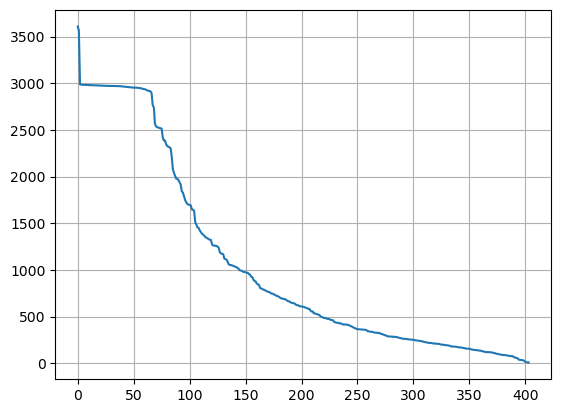

In [71]:
# 구조적으로 활용하기(프로그래밍)

col = 'region'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [76]:
# 속도 계산 필요(슬라이싱)

n_cnt = 5
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [77]:
df[col].value_counts()

others                     410754
columbus                     3608
jacksonville                 3562
spokane / coeur d'alene      2988
eugene                       2985
fresno / madera              2983
Name: region, dtype: int64

In [78]:
df[col].isna().sum()

0

In [79]:
df.columns

# Index(['region(5)', 'price', 'manufacturer(10)', 'model(10)', 'condition(3)', 'cylinders(4)',
#        'fuel(3)', 'odometer', 'transmission(3)', 'drive(3)', 'size(2)', 'type(8)',
#        'paint_color(10)', 'age'],
#       dtype='object')

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

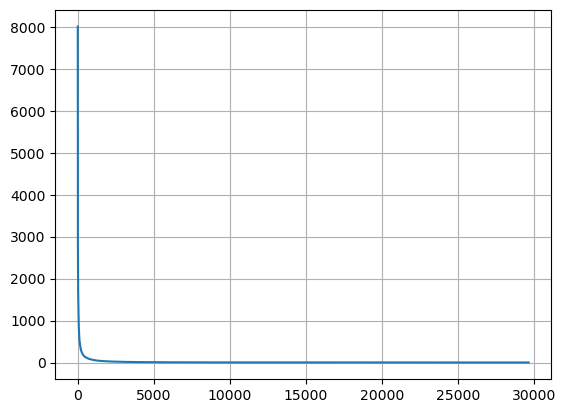

In [80]:
# 구조적으로 활용하기(프로그래밍)

col = 'model'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

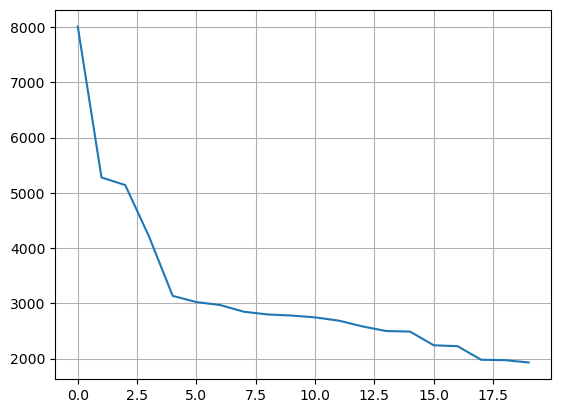

In [82]:
plt.grid()
plt.plot(range(len(counts[:20])), counts[:20])

In [83]:
# 속도 계산 필요(슬라이싱)

n_cnt = 10
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [84]:
df[col].value_counts()

others            391967
f-150               8009
silverado 1500      5140
1500                4211
camry               3135
silverado           3023
accord              2969
wrangler            2848
civic               2799
altima              2779
Name: model, dtype: int64

In [85]:
df[col].isna().sum()

0

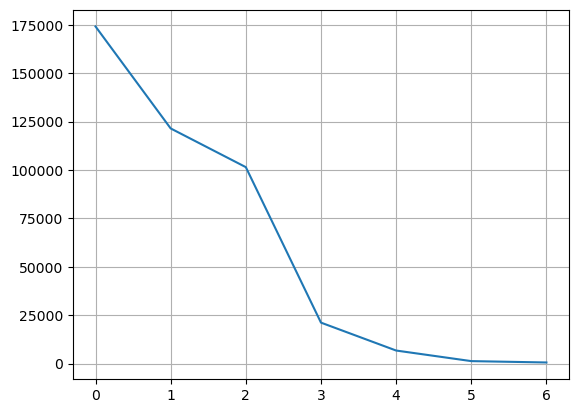

In [86]:
# 구조적으로 활용하기(프로그래밍)

col = 'condition'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [87]:
# 속도 계산 필요(슬라이싱)

n_cnt = 3
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [88]:
df[col].value_counts()

others       203957
good         121456
excellent    101467
Name: condition, dtype: int64

In [89]:
df[col].isna().sum()

0

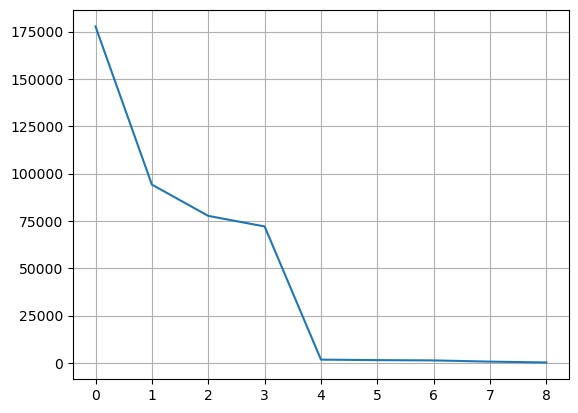

In [90]:
# 구조적으로 활용하기(프로그래밍)

col = 'cylinders'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [91]:
# 속도 계산 필요(슬라이싱)

n_cnt = 4
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [92]:
df[col].value_counts()

others         183007
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
Name: cylinders, dtype: int64

In [93]:
df[col].isna().sum()

0

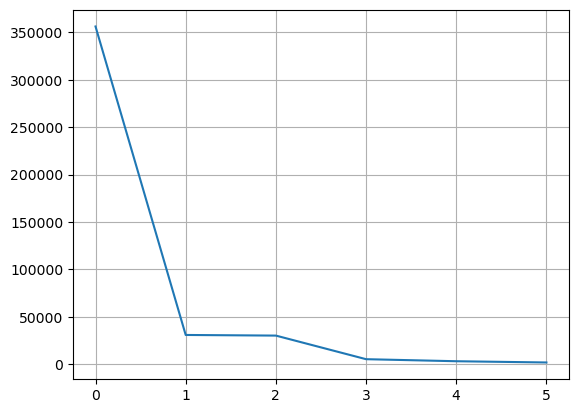

In [94]:
# 구조적으로 활용하기(프로그래밍)

col = 'fuel'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [95]:
# 속도 계산 필요(슬라이싱)

n_cnt = 3
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [99]:
df[col].value_counts()

gas       356209
others     40609
diesel     30062
Name: fuel, dtype: int64

In [98]:
# other, others 값을 합치기

df.loc[df[col] == 'other', col] = 'others'

In [100]:
df[col].isna().sum()

0

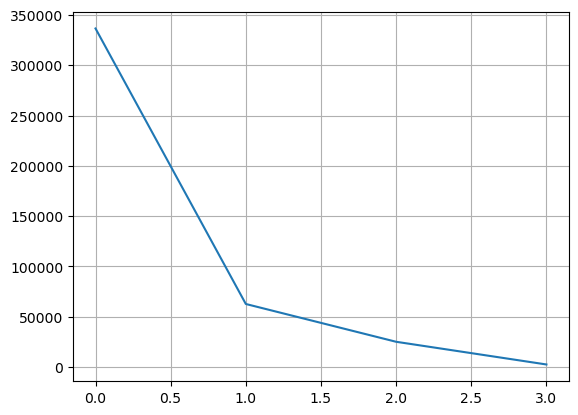

In [101]:
# 구조적으로 활용하기(프로그래밍)

col = 'transmission'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [102]:
# 속도 계산 필요(슬라이싱)

n_cnt = 3
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [105]:
df[col].value_counts()

automatic    336524
others        65238
manual        25118
Name: transmission, dtype: int64

In [104]:
# other, others 값을 합치기

df.loc[df[col] == 'other', col] = 'others'

In [106]:
df[col].isna().sum()

0

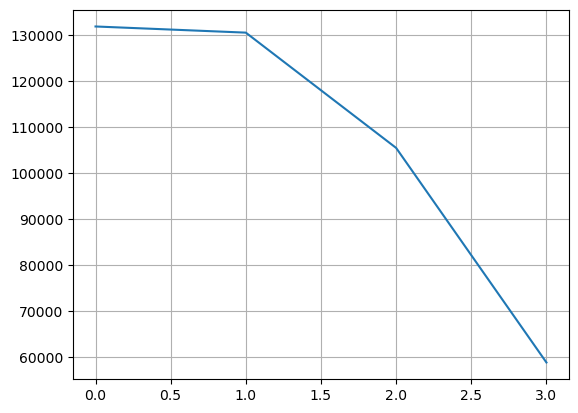

In [107]:
# 구조적으로 활용하기(프로그래밍)

col = 'drive'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [108]:
# 속도 계산 필요(슬라이싱)

n_cnt = 3
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [109]:
df[col].value_counts()

others    189459
4wd       131904
fwd       105517
Name: drive, dtype: int64

In [110]:
df[col].isna().sum()

0

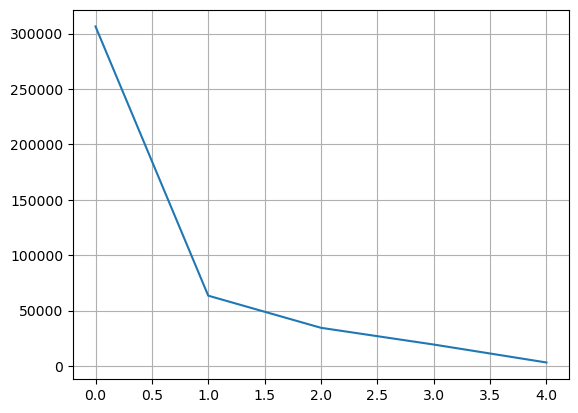

In [111]:
# 구조적으로 활용하기(프로그래밍)

col = 'size'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [113]:
# 속도 계산 필요(슬라이싱)

n_cnt = 2
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [114]:
df[col].value_counts()

others       363415
full-size     63465
Name: size, dtype: int64

In [115]:
df[col].isna().sum()

0

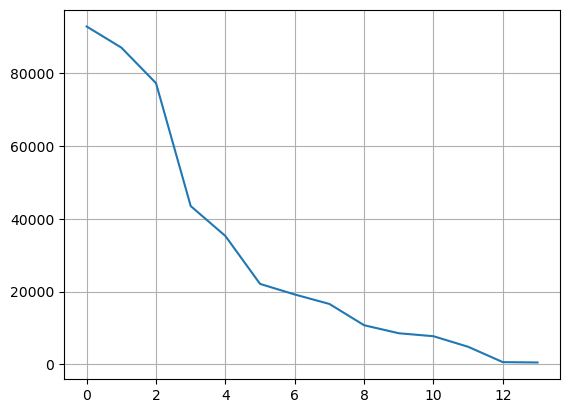

In [116]:
# 구조적으로 활용하기(프로그래밍)

col = 'type'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [117]:
# 속도 계산 필요(슬라이싱)

n_cnt = 8
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [120]:
df[col].value_counts()

others       147949
sedan         87056
SUV           77284
pickup        43510
truck         35279
coupe         19204
hatchback     16598
Name: type, dtype: int64

In [119]:
# other, others 값을 합치기

df.loc[df[col] == 'other', col] = 'others'

In [121]:
df[col].isna().sum()

0

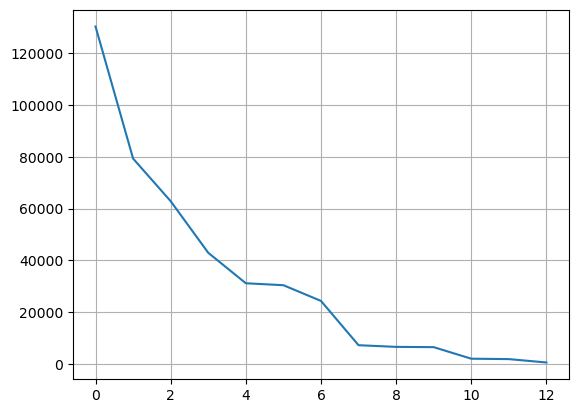

In [122]:
# 구조적으로 활용하기(프로그래밍)

col = 'paint_color'
df[col] = df[col].fillna('others')
counts = df[col].value_counts()

plt.grid()
plt.plot(range(len(counts)), counts)

In [123]:
# 속도 계산 필요(슬라이싱)

n_cnt = 10
others = counts.index[n_cnt:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [124]:
df[col].value_counts()

others    135016
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
green       7343
custom      6700
brown       6593
Name: paint_color, dtype: int64

In [125]:
df[col].isna().sum()

0

### 문제 9. 수치형 데이터 시각화하여 분석하기

In [ ]:
# Seaborn을 이용하여 범주형 데이터를 시각화하여 분석하기
# Hint) 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot을 활용

# 문제 6. 수치형 데이터의 통계 분석하기, 확인 된 내용

### 문제 10. 수치형 데이터 클리닝하기

In [131]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기

p1 = df['price'].quantile(0.99) # 상위 1%
p2 = df['price'].quantile(0.1)  # 하위 10%

print(p1, p2)

66995.0 500.0


In [132]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

In [135]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기

o1 = df['odometer'].quantile(0.99) # 상위 1%
o2 = df['odometer'].quantile(0.1)  # 하위 1%

print(o1, o2)

280000.0 15812.0


In [136]:
df = df[(df['odometer'] < o1) & (df['odometer'] > o2)]

In [137]:
df.describe()

,price,odometer,age
count,335851.000000,335851.000000,335248.000000
mean,17534.838914,101335.798690,11.239056
std,12645.528274,56884.388094,8.469817
min,501.000000,15813.000000,0.000000
25%,7425.500000,53000.000000,6.000000
50%,14500.000000,96936.000000,9.000000
75%,25226.500000,140337.000000,14.000000
max,66992.000000,279974.000000,122.000000


<Axes: xlabel='manufacturer', ylabel='price'>

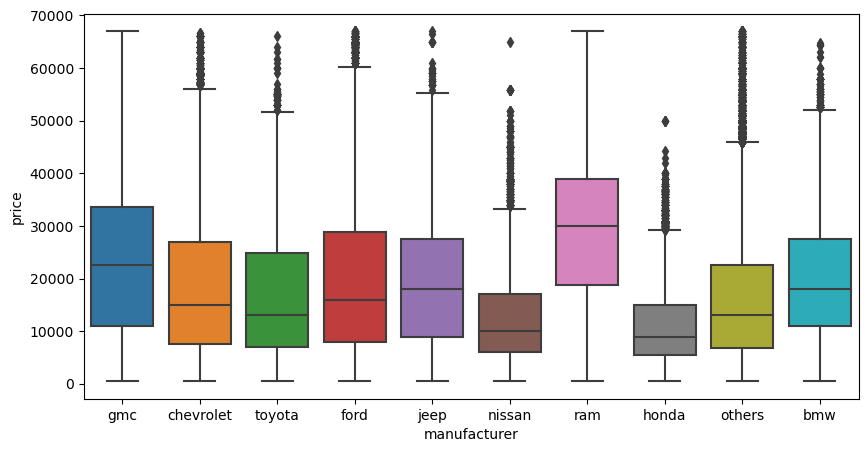

In [139]:
fig = plt.figure(figsize = (10, 5))
sns.boxplot(x = 'manufacturer', y = 'price', data = df)

<Axes: xlabel='model', ylabel='price'>

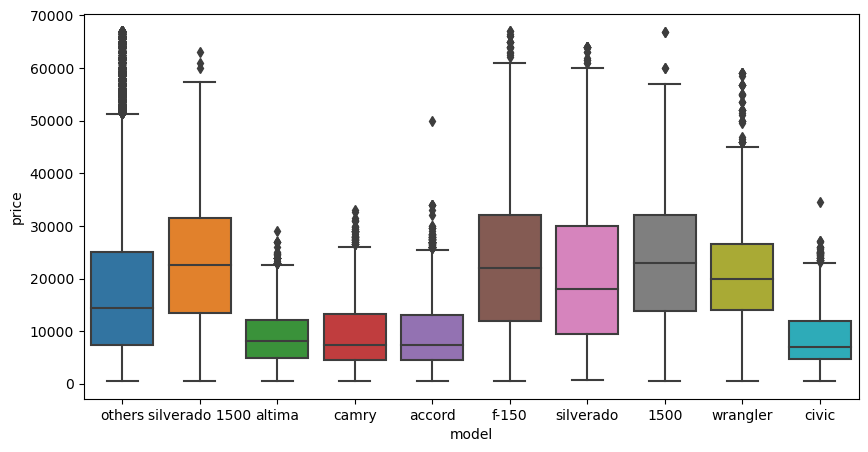

In [140]:
fig = plt.figure(figsize = (10, 5))
sns.boxplot(x = 'model', y = 'price', data = df)

### 문제 11. 컬럼간의 Correlation Heatmap으로 시각화하기

C:\Users\user\AppData\Local\Temp\ipykernel_7364\2074898440.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'YlOrRd')


<Axes: >

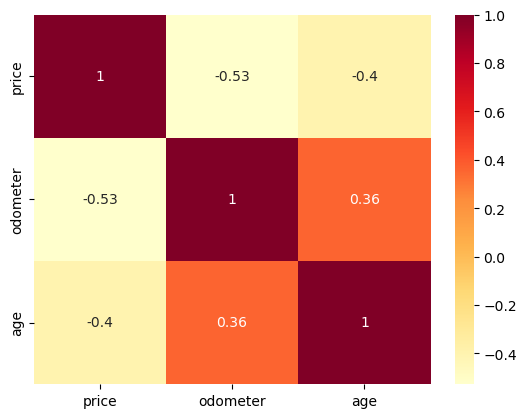

In [142]:
sns.heatmap(df.corr(), annot = True, cmap = 'YlOrRd')

In [146]:
df['age'].isna().sum()

0

In [143]:
df['age'].mean()

11.239055863122227

In [145]:
df['age'].fillna(11.24, inplace = True)

## Step 4. 모델 학습을 위한 데이터 전처리

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
X_num = df[['odometer', 'age']]

scaler = StandardScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price', 'odometer', 'age'], axis = 1)
X_cat = pd.get_dummies(X_cat)

# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis = 1)
y = df['price']

In [149]:
X.head()

,odometer,age,region_columbus,region_eugene,region_fresno / madera,region_jacksonville,region_others,region_spokane / coeur d'alene,manufacturer_bmw,manufacturer_chevrolet,...,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
27,-0.763177,-0.382768,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28,-0.529264,0.089923,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
29,-1.444613,-1.091804,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30,-1.058496,-0.737286,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31,0.468744,-0.264595,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [150]:
X.shape

(335851, 63)

In [151]:
X.isna().sum()

odometer                  0
age                       0
region_columbus           0
region_eugene             0
region_fresno / madera    0
                         ..
paint_color_grey          0
paint_color_others        0
paint_color_red           0
paint_color_silver        0
paint_color_white         0
Length: 63, dtype: int64

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [152]:
from sklearn.model_selection import train_test_split

In [153]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [154]:
from xgboost import XGBRegressor

In [155]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 문제 15. 모델 학습 결과 평가하기

In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [158]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
#print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

5728.374635622205


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


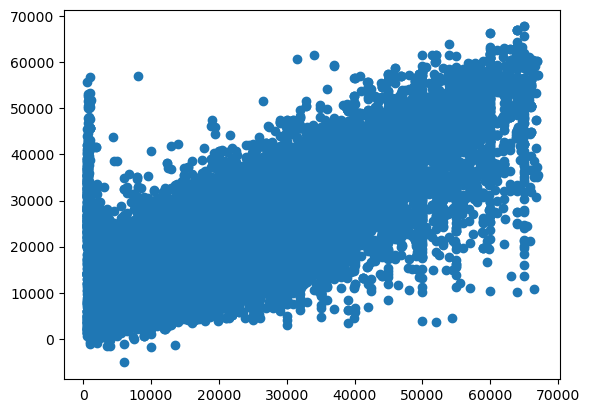

In [159]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용

plt.scatter(x = y_test, y = pred)

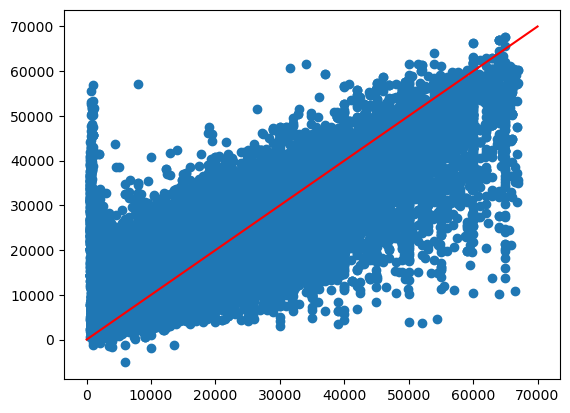

In [160]:
plt.scatter(x = y_test, y = pred)
plt.plot([0, 70000], [0, 70000], 'r-')

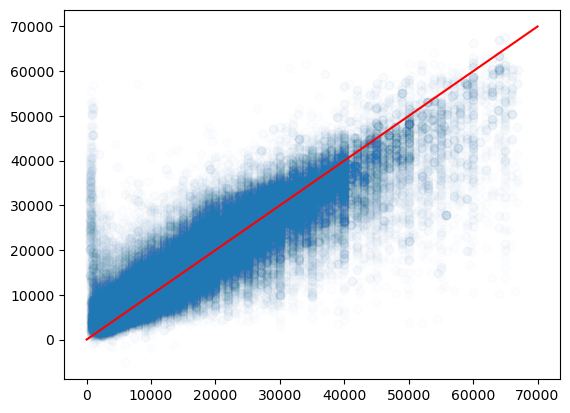

In [165]:
# 상단 그래프 중복 보여지는 내용이 있음
# 잘 보이게 하려면 alpha

plt.scatter(x = y_test, y = pred, alpha = 0.01)
plt.plot([0, 70000], [0, 70000], 'r-')

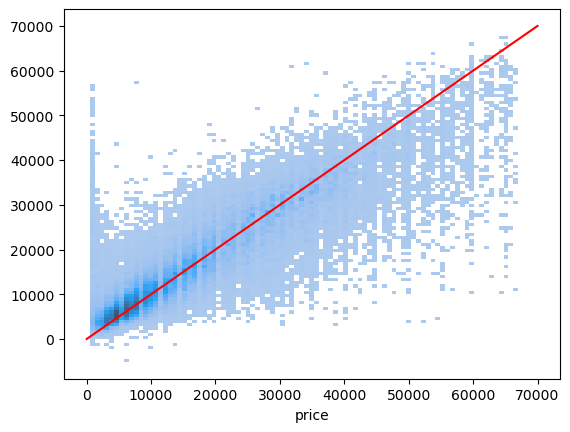

In [168]:
sns.histplot(x = y_test, y = pred)
plt.plot([0, 70000], [0, 70000], 'r-')

### 문제 17. 에러 값의 히스토그램 확인하기


<Axes: xlabel='price', ylabel='Count'>

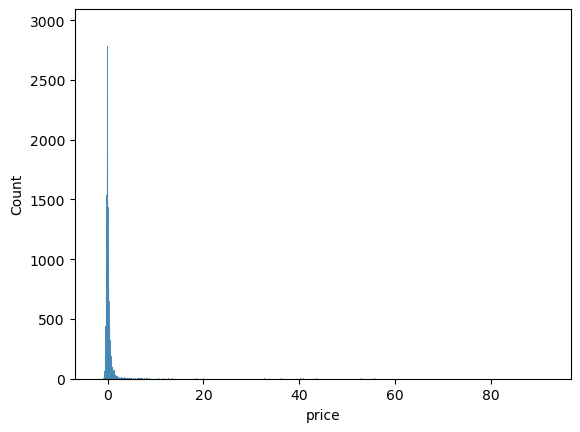

In [169]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test
sns.histplot(data = err)

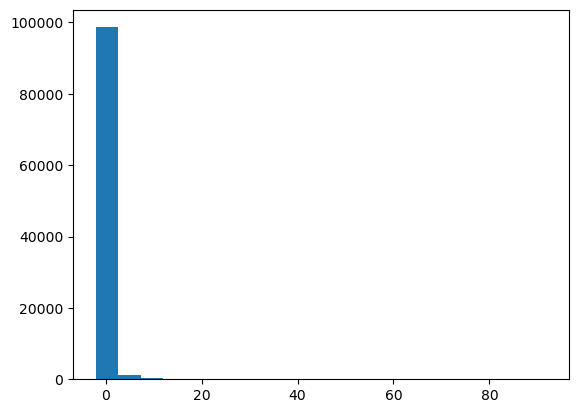

In [170]:
err = (pred - y_test) / y_test

plt.hist(err, bins = 20)
plt.show()

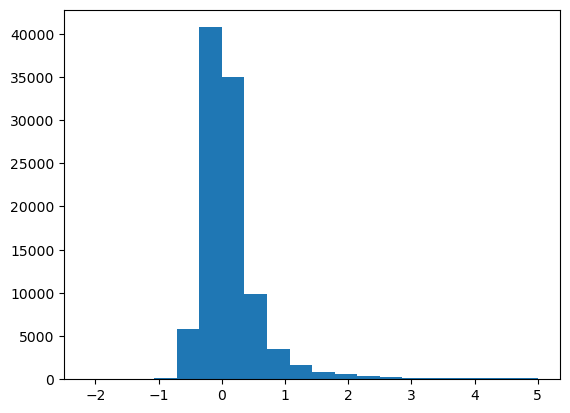

In [171]:
err = (pred - y_test) / y_test

plt.hist(err[err < 5], bins = 20)
plt.show()

Text(0.5, 0, 'error (%)')

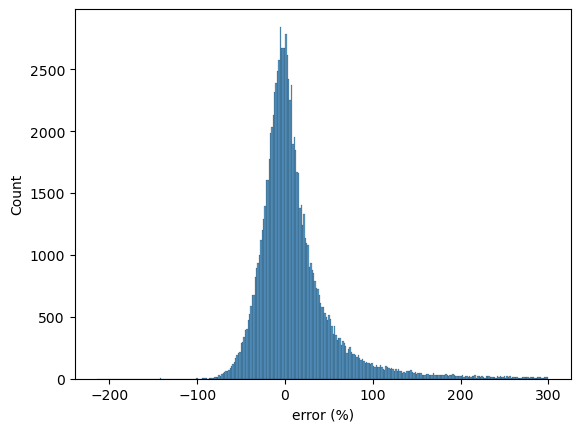

In [172]:
err = ((pred - y_test) / y_test) * 100

sns.histplot(err[err < 300])
plt.xlabel('error (%)')

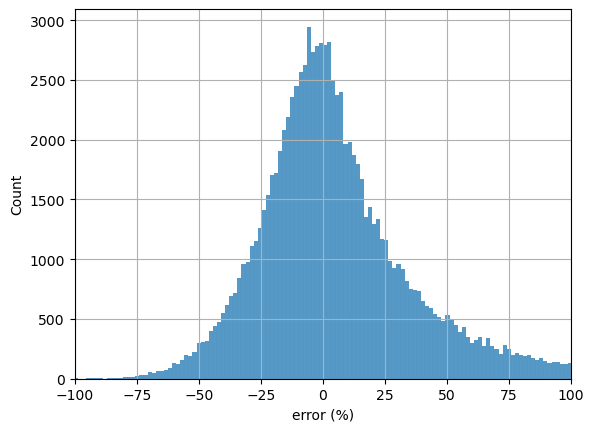

In [173]:
err = ((pred - y_test) / y_test) * 100

sns.histplot(err)
plt.xlabel('error (%)')
plt.xlim(-100, 100)
plt.grid()

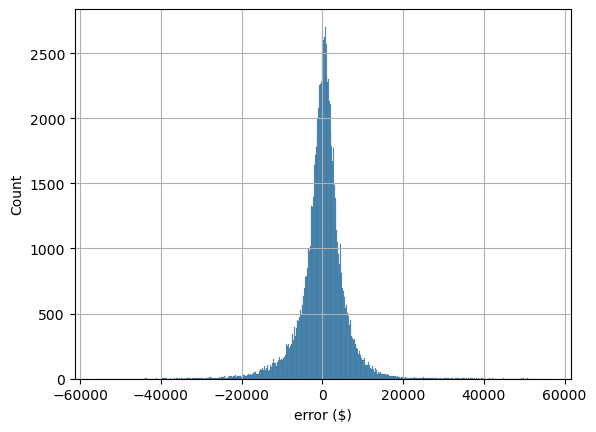

In [174]:
# 가격($)으로 표현

err = pred - y_test

sns.histplot(err)
plt.xlabel('error ($)')
plt.grid()